In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.optimize as opt

## 1.Read and Display

In [15]:
data = pd.read_csv("../Data/data.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


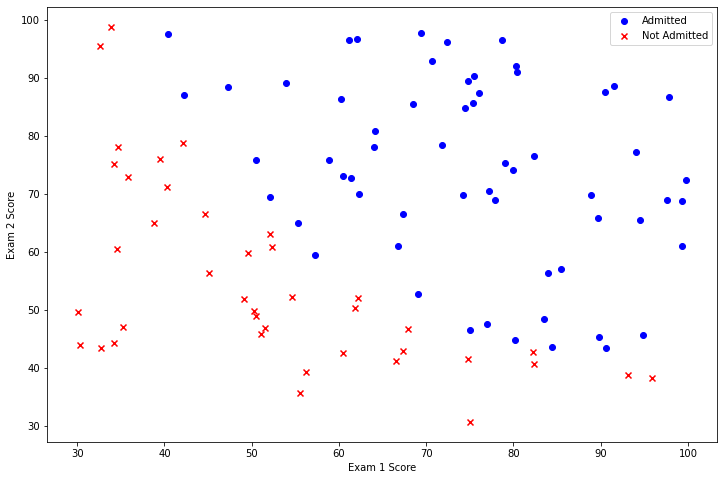

In [16]:
positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive['Exam 1'], positive['Exam 2'], c='b',marker='o')
plt.scatter(negative['Exam 1'], negative['Exam 2'], c='r',marker='x')
plt.legend(['Admitted','Not Admitted'])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

In [17]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1].values)
Y =np.array(data.iloc[:,cols-1:cols].values)
Theta =np.zeros(3)
print(X.shape, Theta.shape, Y.shape)

(100, 3) (3,) (100, 1)


## 2.sigmoid implementation
$h_\theta(x)=g(x\Theta)$   
$z=x\Theta$  
$g(z)=\frac{1}{1+e^{-z}}$  

In [18]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

## 3.Cost Function implementation
$J(\Theta) = -\frac{1}{m} \sum\limits_{i=1}\limits^{m} [y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$  
$J(\Theta) = -\frac{1}{m} [Y^Tlog(g(X\Theta))+(1-Y)^Tlog(1-g(X\Theta))]$  

In [19]:
def CostFunction(Theta,X,Y):
    Theta=np.mat(Theta).T
    X=np.mat(X)
    Y=np.mat(Y)   
    return (-(Y.T*np.log(Sigmoid(X*Theta))+(1-Y).T*np.log(1-Sigmoid(X*Theta)))/len(X))[0,0]

## 4.Gradient Descent
Here we calculate the value of θ with the tool library.  
we need to tell the function of tool library: Cost Function,$\frac{\partial}{\partial{θ_j}}J(θ)$,arguments.  
We don't need to define the number of iterations and learning rate, the function will directly tell us the optimal solution.  
$\frac{\partial}{\partial{θ_j}}J(θ)=\sum\limits_{i=1}\limits^{m}[h_\theta(x^{(i)})-y^{(i)}] \cdot x_j^{(i)} ~ ~ ~ ,j=0,\cdots,n$   
$\frac{\partial}{\partial{θ_j}}J(θ)=X^T(g(X\Theta)-Y)$  

In [20]:
def GetPartial(Theta,X,Y):
    Theta=np.mat(Theta).T
    X=np.mat(X)
    Y=np.mat(Y)
    return np.array(X.T*(Sigmoid(X*Theta)-Y))[:,0]

In [21]:
print(CostFunction(Theta,X,Y))

0.6931471805599452


In [22]:
result = opt.fmin_tnc(func=CostFunction, x0=Theta, fprime=GetPartial, args=(X,Y))
"""
func：function_name(return value)
x0：array
fprime:function_name(return array)
args:tuple(array)
"""
print(result)

(array([-25.17486453,   0.20633653,   0.20158463]), 74, 1)


In [23]:
print(CostFunction(result[0],X,Y))

0.2034977292152026


## 5.Predict

In [26]:
def predict1(Theta, X):
    Theta=np.mat(Theta).T
    X=np.mat(X)
    return Sigmoid(X*Theta)[0,0]
print(predict1(result[0],[1,45,85]))

0.7764284194853233


## 6.Evaluate

In [28]:
def predict2(Theta, X):
    Theta=np.mat(Theta).T
    X=np.mat(X)
    P=Sigmoid(X*Theta)
    return [1 if p >= 0.5 else 0 for p in P]
predictions = predict2(result[0], X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy =sum(correct) / len(correct)
print (accuracy)

0.89


## Attachment 1:Decision Boundary

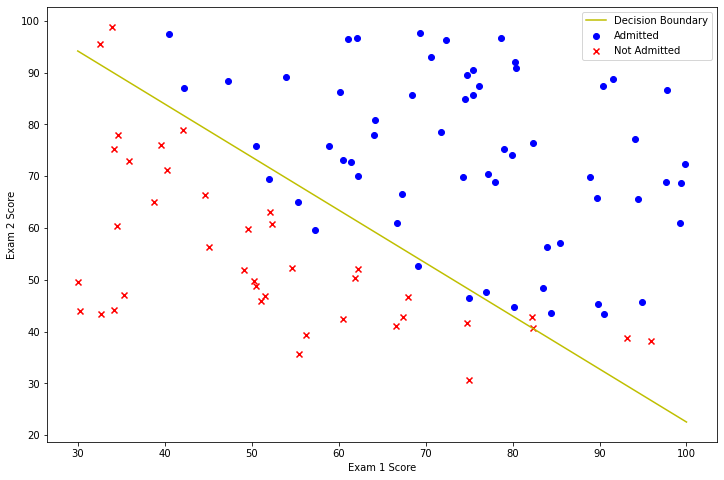

In [32]:
predict_Exam1 = np.linspace(30, 100, 100)
predict_Exam2 = ( - result[0][0] - result[0][1] *predict_Exam1) / result[0][2]
plt.figure(figsize=(12,8))
plt.plot(predict_Exam1, predict_Exam2, 'y', label='Decision Boundary')
plt.scatter(positive['Exam 1'], positive['Exam 2'], c='b', marker='o', label='Admitted')
plt.scatter(negative['Exam 1'], negative['Exam 2'], c='r', marker='x', label='Not Admitted')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()